<h1> Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

**Insight**
- Import seluruh libraries yang dibutuhkan

<h1> Data Loading

In [3]:
df = pd.read_csv('D:\DBS Foundation Bootcamp\Machine Learning Terapan\predictive-analysis\dataset\heart_attack_prediction_indonesia.csv')

**Insight**
- Loading data menggunakan pandas dengan path dataset yang sudah di tentukan

<h1> EDA Variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             158355 non-null  object 
 12  physical_activit

**Insight**
- Tipe data
    - 17 kolom bertipe numerik (int64 dan float64) → cocok untuk analisis statistik dan pemodelan langsung.
    - 10 kolom bertipe kategorikal (object) → perlu dilakukan encoding sebelum digunakan dalam model ML.

- Target Variabel : heart_attack (integer, kemungkinan 0 atau 1)
    - 0 : Tidak mengalami serangan jantung
    - 1 : Mengalami serangan jantung

In [5]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


**Insight**
- Setelah di cek, terlalu banyak kolom yang ada
- Coba hapus yang tidak diperlukan

In [6]:
df = df.drop(['region', 'income_level', 'family_history', 'alcohol_consumption', 'EKG_results', 'participated_in_free_screening'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       158355 non-null  int64  
 1   gender                    158355 non-null  object 
 2   hypertension              158355 non-null  int64  
 3   diabetes                  158355 non-null  int64  
 4   cholesterol_level         158355 non-null  int64  
 5   obesity                   158355 non-null  int64  
 6   waist_circumference       158355 non-null  int64  
 7   smoking_status            158355 non-null  object 
 8   physical_activity         158355 non-null  object 
 9   dietary_habits            158355 non-null  object 
 10  air_pollution_exposure    158355 non-null  object 
 11  stress_level              158355 non-null  object 
 12  sleep_hours               158355 non-null  float64
 13  blood_pressure_systolic   158355 non-null  i

**Insight**
- Kolom seperti region, income_level, alcohol_consumption, EKG_results, participated_in_free_screening, dll. telah dihapus.
- Dataset kini lebih fokus pada faktor klinis, gaya hidup, dan psikologis, yang lebih relevan untuk prediksi serangan jantung.



In [7]:
df.head()

,age,gender,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,smoking_status,physical_activity,dietary_habits,...,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,heart_attack
0,60,Male,0,1,211,0,83,Never,High,Unhealthy,...,5.970603,113,62,173,48,121,101,0,0,0
1,53,Female,0,0,208,0,106,Past,Moderate,Healthy,...,5.643813,132,76,70,58,83,138,1,0,0
2,62,Female,0,0,231,1,112,Past,Moderate,Healthy,...,6.336197,116,74,118,69,130,171,0,1,1
3,73,Male,1,0,202,0,82,Never,Moderate,Unhealthy,...,7.912990,136,65,98,52,85,146,0,1,0
4,52,Male,1,0,232,0,89,Current,Moderate,Unhealthy,...,3.252338,127,75,104,59,127,139,1,0,1


**Insight**
- Karena adanya beberapa data yang nilainya 0/1 di dalam type data integer, maka ubah terlebih dahulu menjadi type category

In [8]:
binary_categorical_cols = [
    'hypertension', 'diabetes', 'obesity', 
    'previous_heart_disease', 'medication_usage', 'heart_attack'
]

for col in binary_categorical_cols:
    df[col] = df[col].astype('category')

**Insight**
- Mengubah tipe data integer pada kolom yang bersifat category yg memiliki nilai 1 / 0
- Meningkatkan kompatibilitas visualisasi, seperti saat membuat plot countplot, catplot, atau groupby.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   age                       158355 non-null  int64   
 1   gender                    158355 non-null  object  
 2   hypertension              158355 non-null  category
 3   diabetes                  158355 non-null  category
 4   cholesterol_level         158355 non-null  int64   
 5   obesity                   158355 non-null  category
 6   waist_circumference       158355 non-null  int64   
 7   smoking_status            158355 non-null  object  
 8   physical_activity         158355 non-null  object  
 9   dietary_habits            158355 non-null  object  
 10  air_pollution_exposure    158355 non-null  object  
 11  stress_level              158355 non-null  object  
 12  sleep_hours               158355 non-null  float64 
 13  blood_pressure_systolic   158

**Insight**
- Data sudah terubah

In [10]:
df.duplicated().sum()

0

<h1> EDA Missing Values dan Outliers

In [37]:
# Check for missing values
df.isnull().sum()

age                         0
gender                      0
hypertension                0
diabetes                    0
cholesterol_level           0
obesity                     0
waist_circumference         0
smoking_status              0
physical_activity           0
dietary_habits              0
air_pollution_exposure      0
stress_level                0
sleep_hours                 0
blood_pressure_systolic     0
blood_pressure_diastolic    0
fasting_blood_sugar         0
cholesterol_hdl             0
cholesterol_ldl             0
triglycerides               0
previous_heart_disease      0
medication_usage            0
heart_attack                0
dtype: int64

**Insight**
- Tidak ada data yang missing values atau kosong

In [38]:
numeric_features = [
    'age',
    'cholesterol_level',
    'waist_circumference',
    'sleep_hours',
    'blood_pressure_systolic',
    'blood_pressure_diastolic',
    'fasting_blood_sugar',
    'cholesterol_hdl',
    'cholesterol_ldl',
    'triglycerides'
]

categorical_features = [
    'gender',
    'smoking_status',
    'physical_activity',
    'dietary_habits',
    'air_pollution_exposure',
    'stress_level',
    'hypertension',
    'diabetes',
    'obesity',
    'previous_heart_disease',
    'medication_usage'
]

**Insight** 
- Sebelum memulai ke tahap outliers, perlu membuat variabel untuk membedakan numeric dan categoric

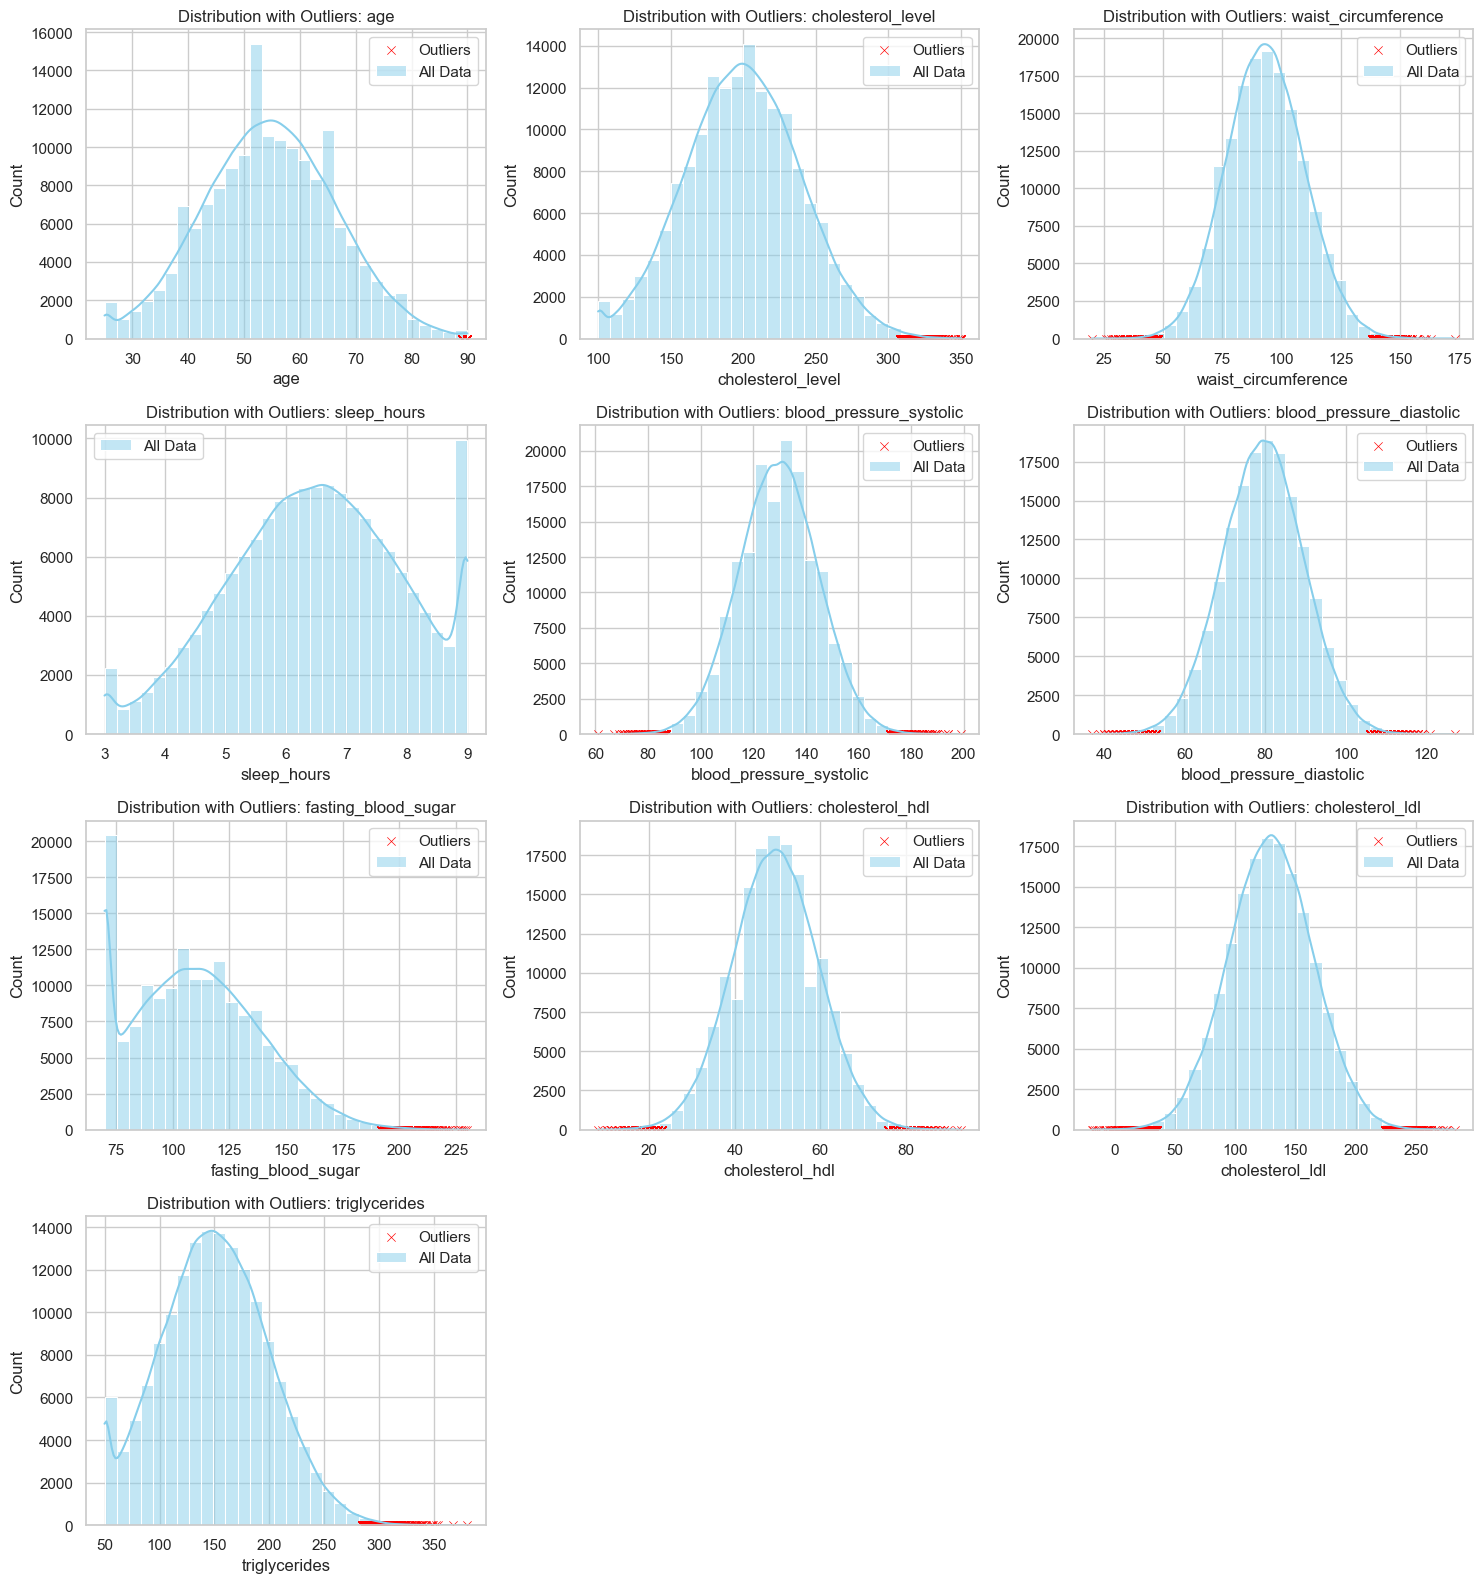

In [39]:
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Simpan outlier untuk tiap kolom
outlier_summary = {col: detect_outliers_iqr(df, col) for col in numeric_features}

# Buat visualisasi
n_features = len(numeric_features)
n_cols = 3  # Misalnya 3 kolom per baris
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30, label='All Data')

    # Plot outliers jika ada
    if not outlier_summary[col].empty:
        sns.scatterplot(
            x=outlier_summary[col][col],
            y=[0.5] * len(outlier_summary[col]),
            color='red',
            label='Outliers',
            marker='x'
        )

    plt.title(f'Distribution with Outliers: {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

**Insight**
- Setelah dilakukan deteksi outliers menggunakan IQR didapatkan hasil visualisasi seperti di atas. (warna merah muda) dan sesudah (warna hijau) penghapusan outlier. Penghapusan outlier bertujuan untuk memperbaiki distribusi data dan menghindari pengaruh negatif nilai ekstrem terhadap model.
- age: Distribusi sedikit miring ke kanan, menunjukkan outlier pada usia tinggi (>80).
- cholesterol_level: Distribusi normal, namun outlier terlihat di atas 300 mg/dL.
- waist_circumference: Distribusi normal dengan outlier di atas 150 cm.
- sleep_hours: Terlihat outlier pada jam tidur ekstrem (<4 dan >9 jam).
- blood_pressure_systolic & diastolic: Distribusi mendekati normal, outlier muncul di atas 180/120 mmHg.
- fasting_blood_sugar: Skew kanan dengan banyak outlier di atas 160 mg/dL.
- cholesterol_hdl, ldl: Distribusi normal, outlier di atas 80 untuk HDL dan >200 untuk LDL.
- triglycerides: Distribusi skew kanan dengan outlier di atas 300 mg/dL.

In [40]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_no_outliers = remove_outliers_iqr(df, numeric_features)

**Insight**
- Kode diatas untuk menghapus outliers dan disimpan ke df_no_outliers

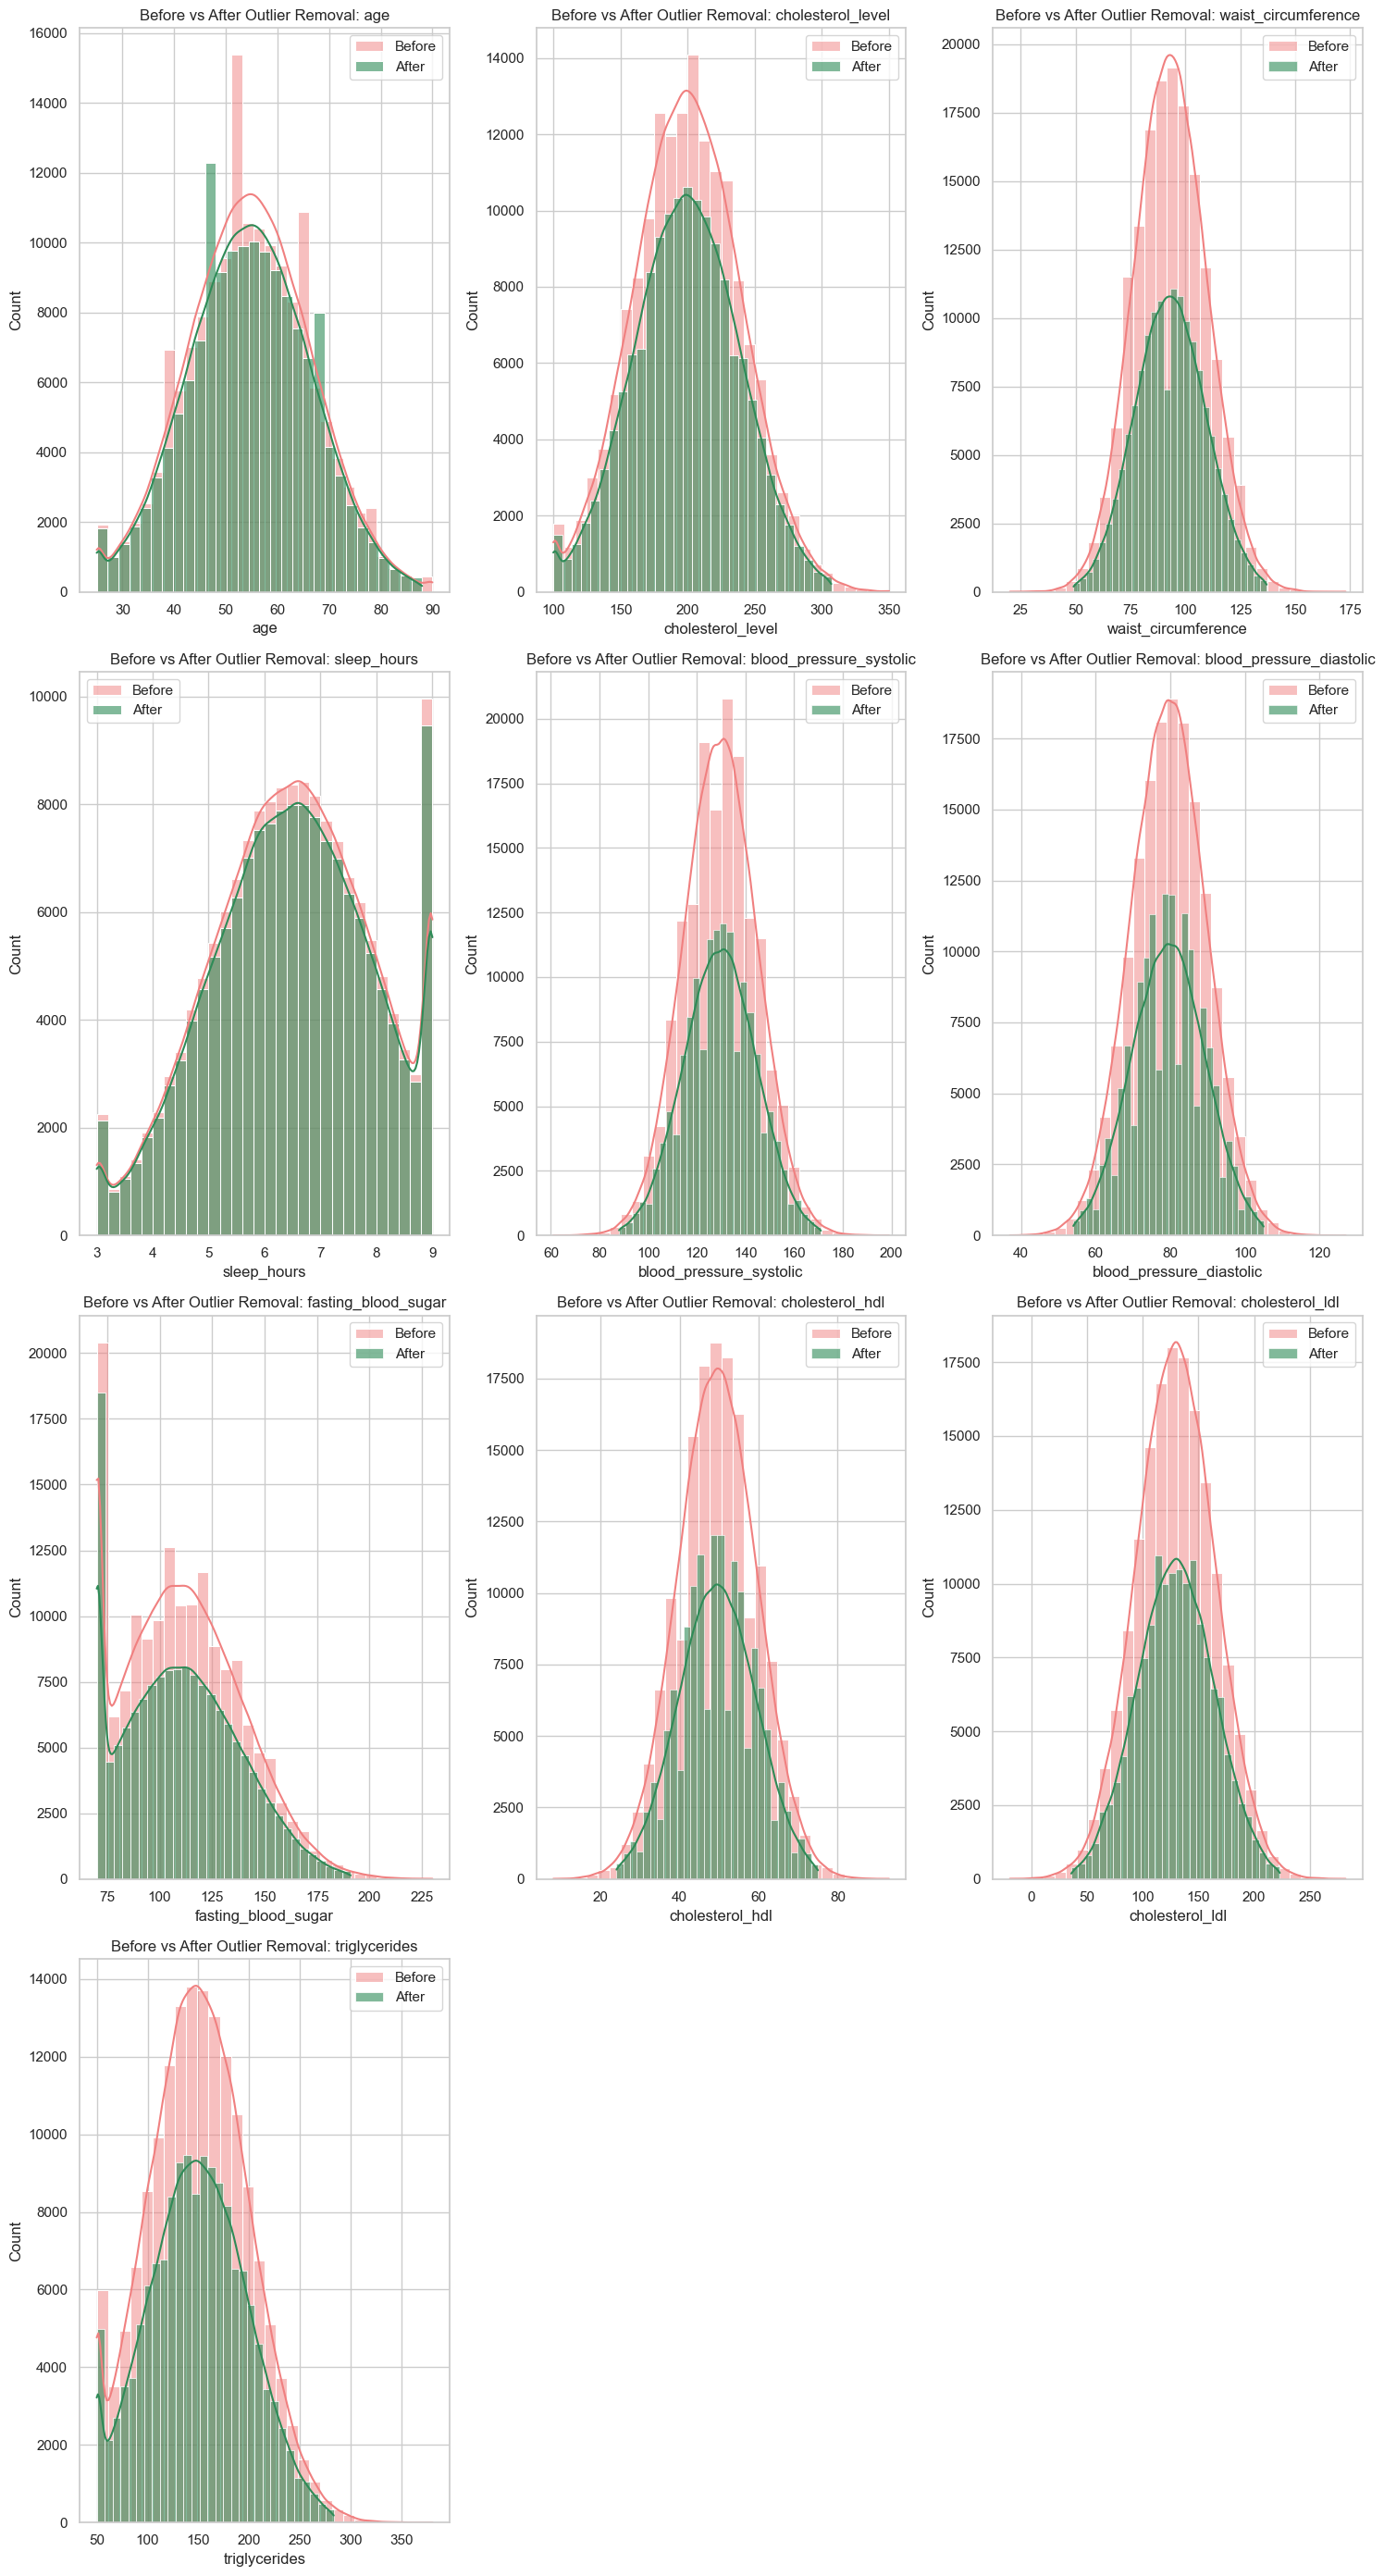

In [41]:
# Buat subplot untuk data sebelum & sesudah
n_features = len(numeric_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 7))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Histogram sebelum
    sns.histplot(df[col], kde=True, color='lightcoral', bins=30, label='Before')
    
    # Histogram sesudah
    sns.histplot(df_no_outliers[col], kde=True, color='seagreen', bins=30, label='After', alpha=0.6)

    plt.title(f'Before vs After Outlier Removal: {col}')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()

**Insight**
- Setelah dilakukan penghapusan, dapat dilihat signifikan data data yang ekstrem sudah terhapus

<h1> EDA Univariate

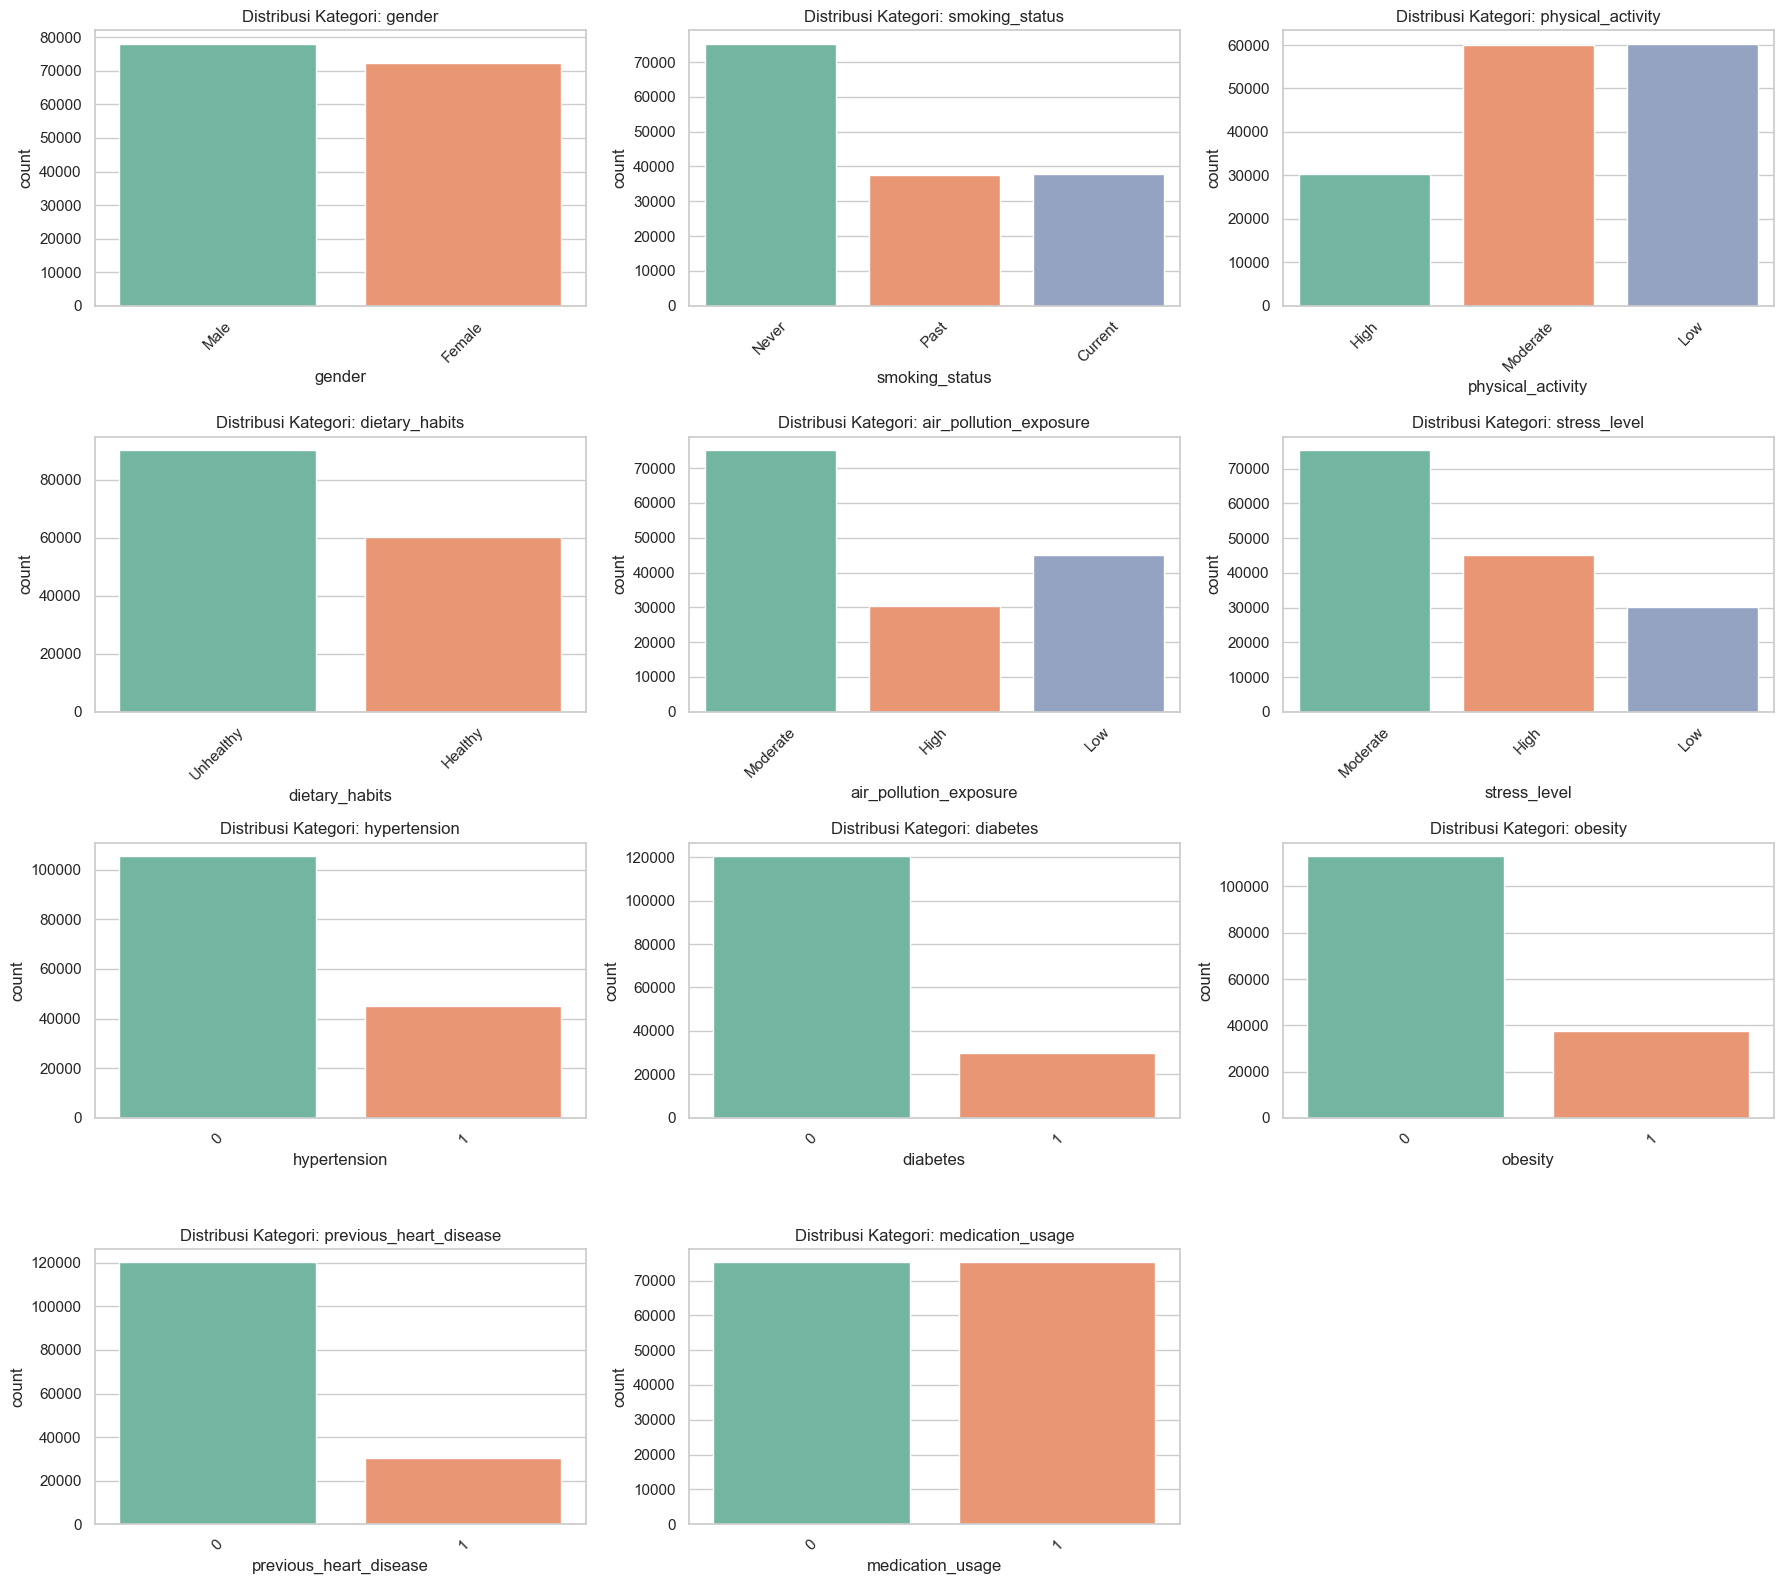

In [42]:
import math

n_features = len(categorical_features)
n_cols = 3  # kamu bisa atur sesuai lebar yang diinginkan
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # agar indexing jadi 1 dimensi

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df_no_outliers, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribusi Kategori: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Untuk subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- gender
    - Distribusi gender relatif seimbang antara pria dan wanita.
- smoking_status
    - Kategori terbanyak adalah perokok yang tidak pernah merokok, diikuti oleh perokok saat ini dan mantan perokok.
- physical_activity
    - Mayoritas individu memiliki tingkat aktivitas fisik sedang dan rendah, sedangkan aktivitas tinggi hanya sebagian kecil.
- dietary_habits
    - Sebagian besar peserta memiliki kebiasaan makan yang tidak sehat dibandingkan yang sehat.
- air_pollution_exposure
    - Paparan polusi udara sedang paling dominan, diikuti oleh rendah dan tinggi.
- stress_level
    - Mayoritas individu memiliki tingkat stres sedang, dengan jumlah yang lebih sedikit pada tingkat tinggi dan rendah.
- hypertension, diabetes, obesity, previous_heart_disease, medication_usage
    - Untuk variabel biner ini (0: tidak, 1: ya), mayoritas responden tidak memiliki hipertensi, diabetes, obesitas, riwayat penyakit jantung, ataupun penggunaan obat.

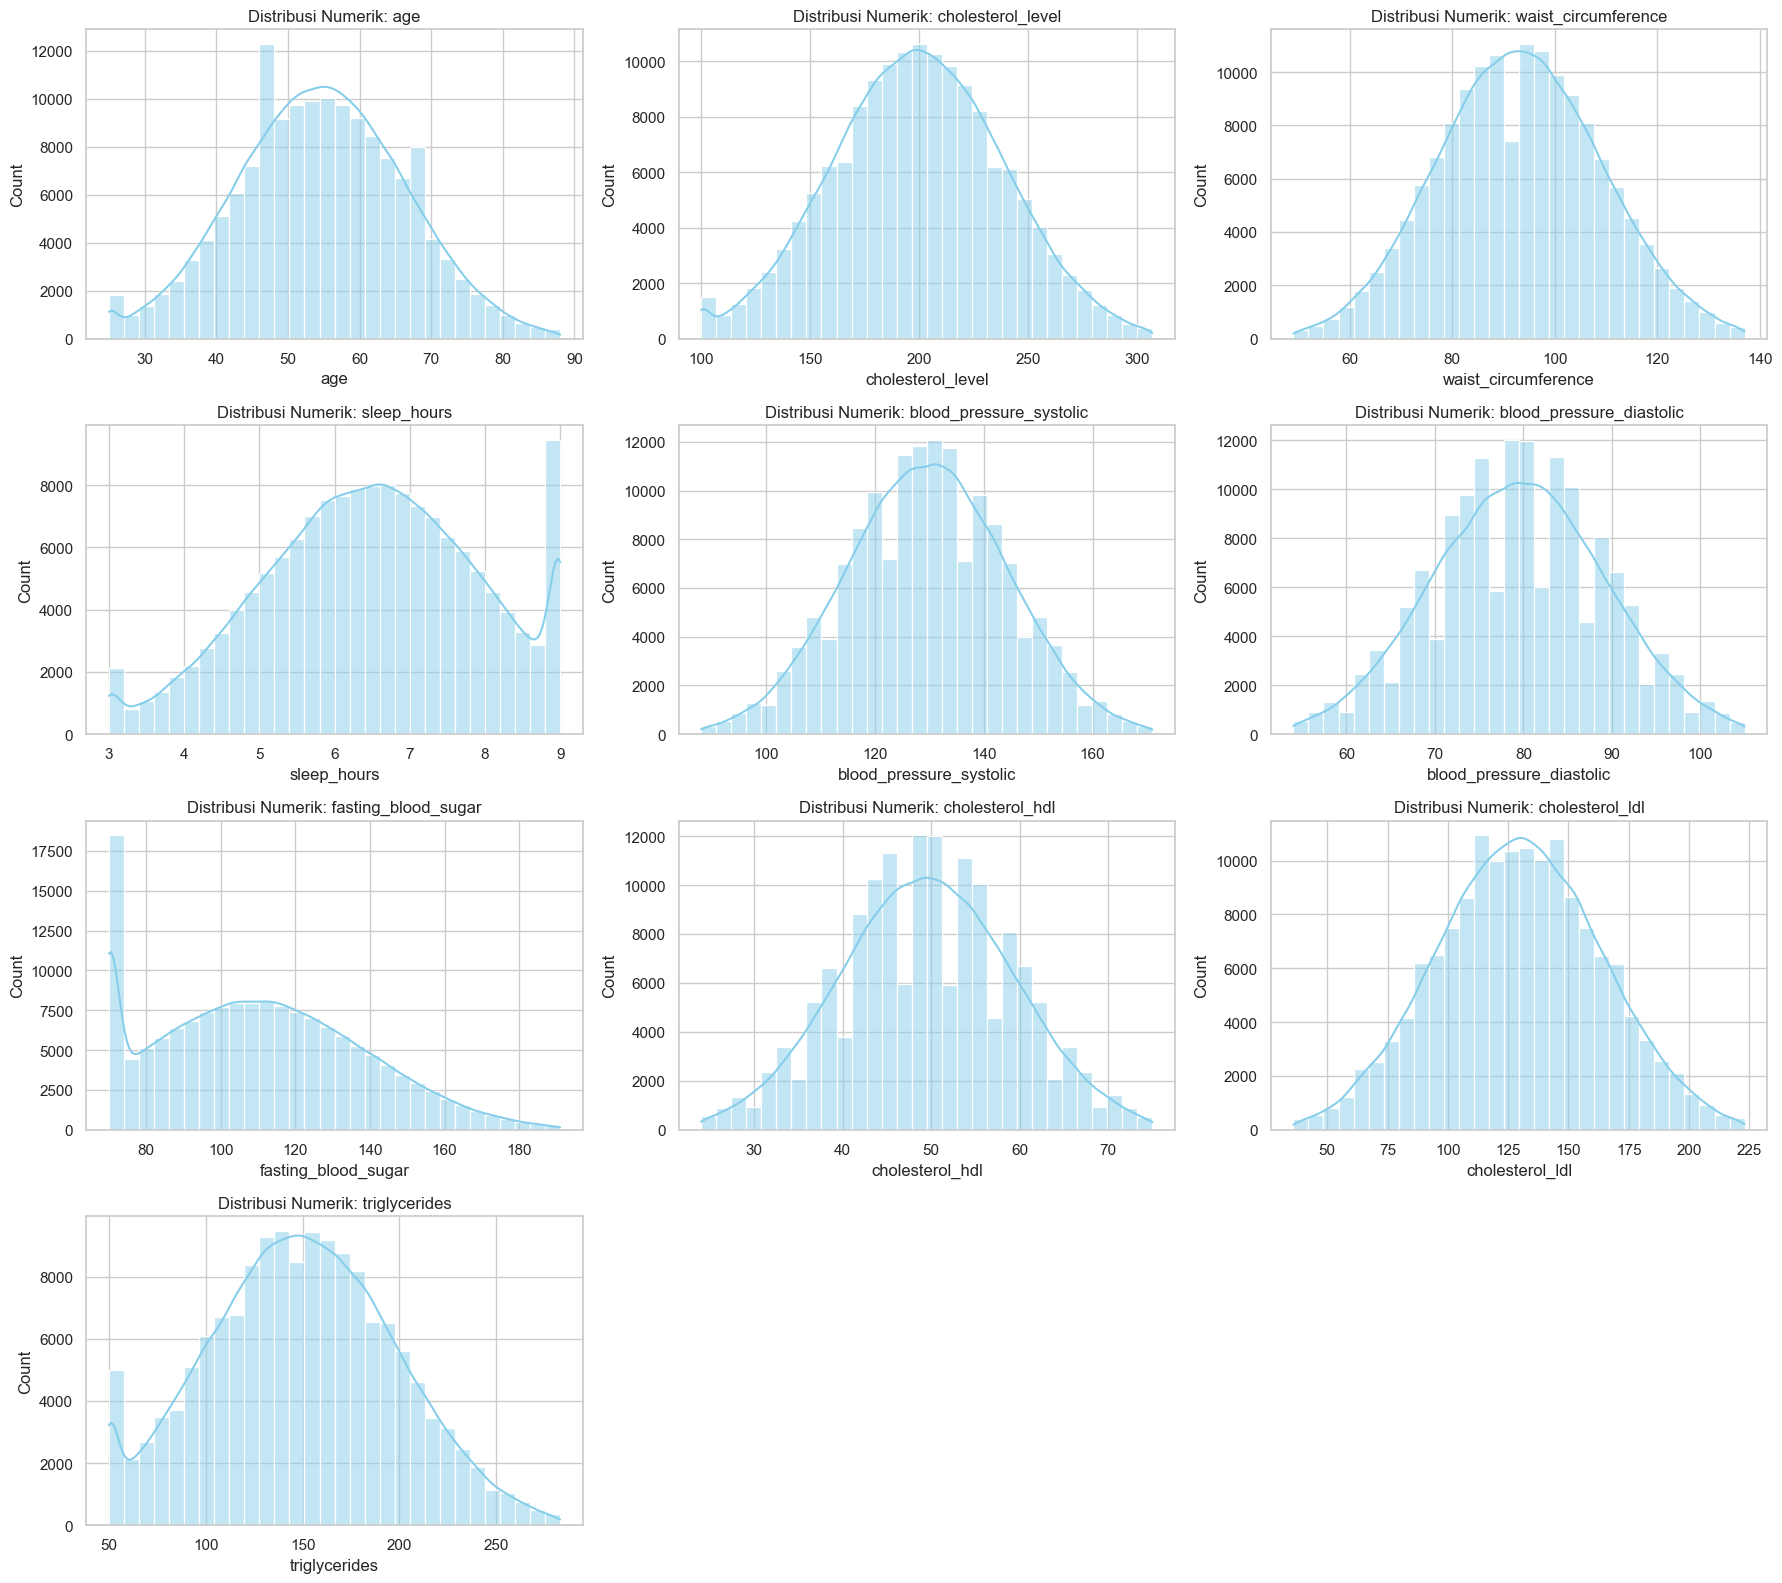

In [43]:
n_features = len(numeric_features)
n_cols = 3  # atur sesuai selera, misal 3 kolom
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(df_no_outliers[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribusi Numerik: {col}')
    axes[i].set_xlabel(col)

# Hapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- age
    - Distribusi usia membentuk pola mirip distribusi normal, puncak berada di sekitar usia 60 tahun.
- cholesterol_level
    - Distribusi cenderung simetris dengan puncak sekitar 200 mg/dL.
- waist_circumference
    - Distribusi normal dengan puncak sekitar 90–100 cm.
- sleep_hours
    - Distribusi tidak sepenuhnya normal, ada puncak di sekitar 6–8 jam dengan kenaikan tajam di 9 jam.
- blood_pressure_systolic dan blood_pressure_diastolic
    - Keduanya memiliki distribusi yang relatif normal dengan rata-rata sistolik di sekitar 130 mmHg dan diastolik di sekitar 80 mmHg.
- fasting_blood_sugar
    - Distribusi condong ke kanan (skewed), dengan sebagian besar nilai antara 90–120 mg/dL.
- cholesterol_hdl, cholesterol_ldl
    - Kedua variabel kolesterol menunjukkan distribusi mendekati normal, dengan HDL sekitar 50 mg/dL dan LDL sekitar 130 mg/dL.
- triglycerides
    - Distribusi sedikit skewed ke kanan, sebagian besar nilai berkisar di bawah 200 mg/dL.

<h1> EDA Multivariate

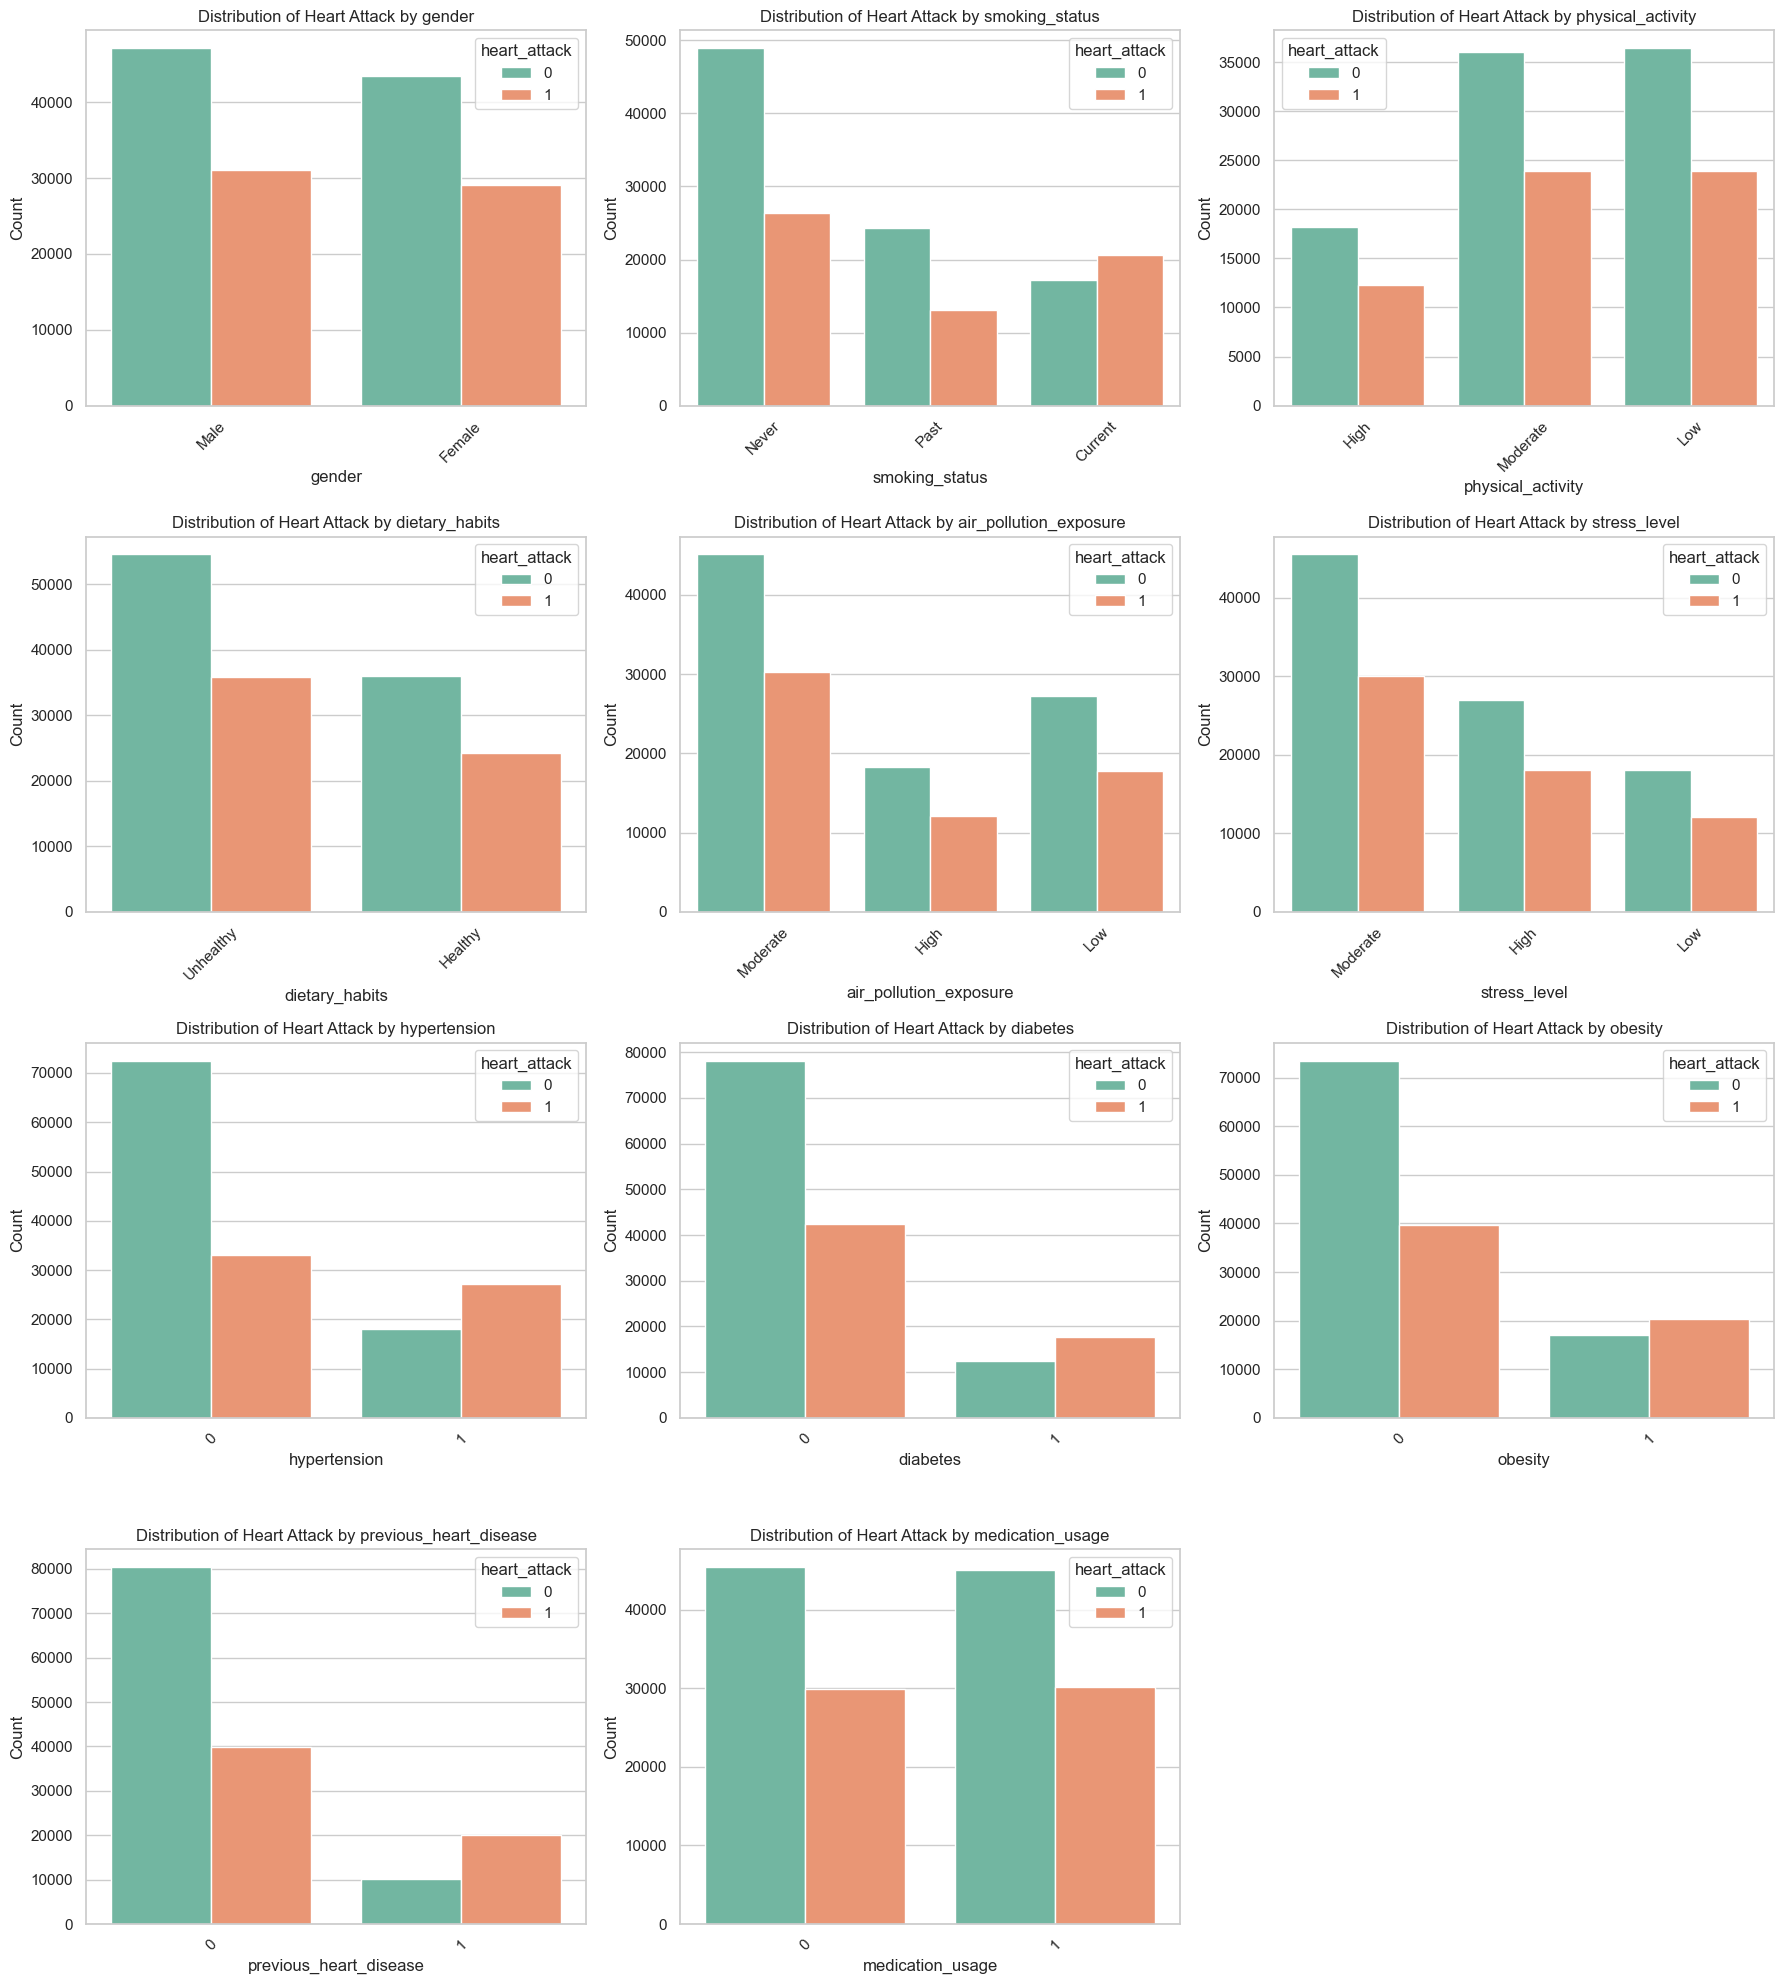

In [44]:
sns.set(style="whitegrid")

n_features = len(categorical_features)
n_cols = 3  # bisa diubah
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df_no_outliers, x=col, hue="heart_attack", palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of Heart Attack by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- Gender:
    - Laki-laki memiliki jumlah serangan jantung lebih tinggi dibanding perempuan.
    - Risiko serangan jantung tampaknya lebih tinggi pada pria, konsisten dengan studi medis.
- Smoking Status:
    - Individu yang merokok saat ini (current) memiliki jumlah serangan jantung yang tinggi relatif terhadap jumlah total mereka.
    - Yang tidak pernah merokok (never) memiliki jumlah kasus serangan jantung yang jauh lebih kecil.
- Physical Activity:
    - Aktivitas fisik yang tinggi dikaitkan dengan lebih sedikit kasus serangan jantung.
    - Yang rendah memiliki proporsi kasus serangan jantung lebih tinggi, menunjukkan aktivitas fisik rendah sebagai faktor risiko.
- Dietary Habits:
    - Individu dengan pola makan sehat memiliki jumlah serangan jantung lebih rendah.
    - Sebaliknya, yang memiliki pola makan tidak sehat (unhealthy) menunjukkan jumlah kasus yang lebih besar.
- Air Pollution Exposure:
    - Paparan tinggi terhadap polusi udara cenderung memiliki lebih banyak kasus serangan jantung.
    - Menunjukkan bahwa kualitas lingkungan juga berdampak pada kesehatan jantung.
- Stress Level:
    - Tingkat stres tinggi berkorelasi dengan jumlah kasus serangan jantung yang lebih tinggi dibandingkan yang stresnya rendah.
- Hypertension, Diabetes, Obesity:
    - Semua kondisi ini menunjukkan jumlah serangan jantung yang jauh lebih tinggi pada kelompok dengan kondisi tersebut dibandingkan yang tidak.
    - Ini konsisten dengan faktor risiko klinis yang diketahui.
- Previous Heart Disease:
    - Riwayat penyakit jantung sebelumnya sangat mempengaruhi, jumlah serangan jantung jauh lebih besar pada yang memiliki riwayat ini
- Medication Usage:
    - Menariknya, jumlah serangan jantung tetap tinggi baik pada yang menggunakan maupun tidak menggunakan obat, menunjukkan bahwa pengobatan tidak selalu cukup untuk pencegahan tanpa pengelolaan faktor risiko lainnya.

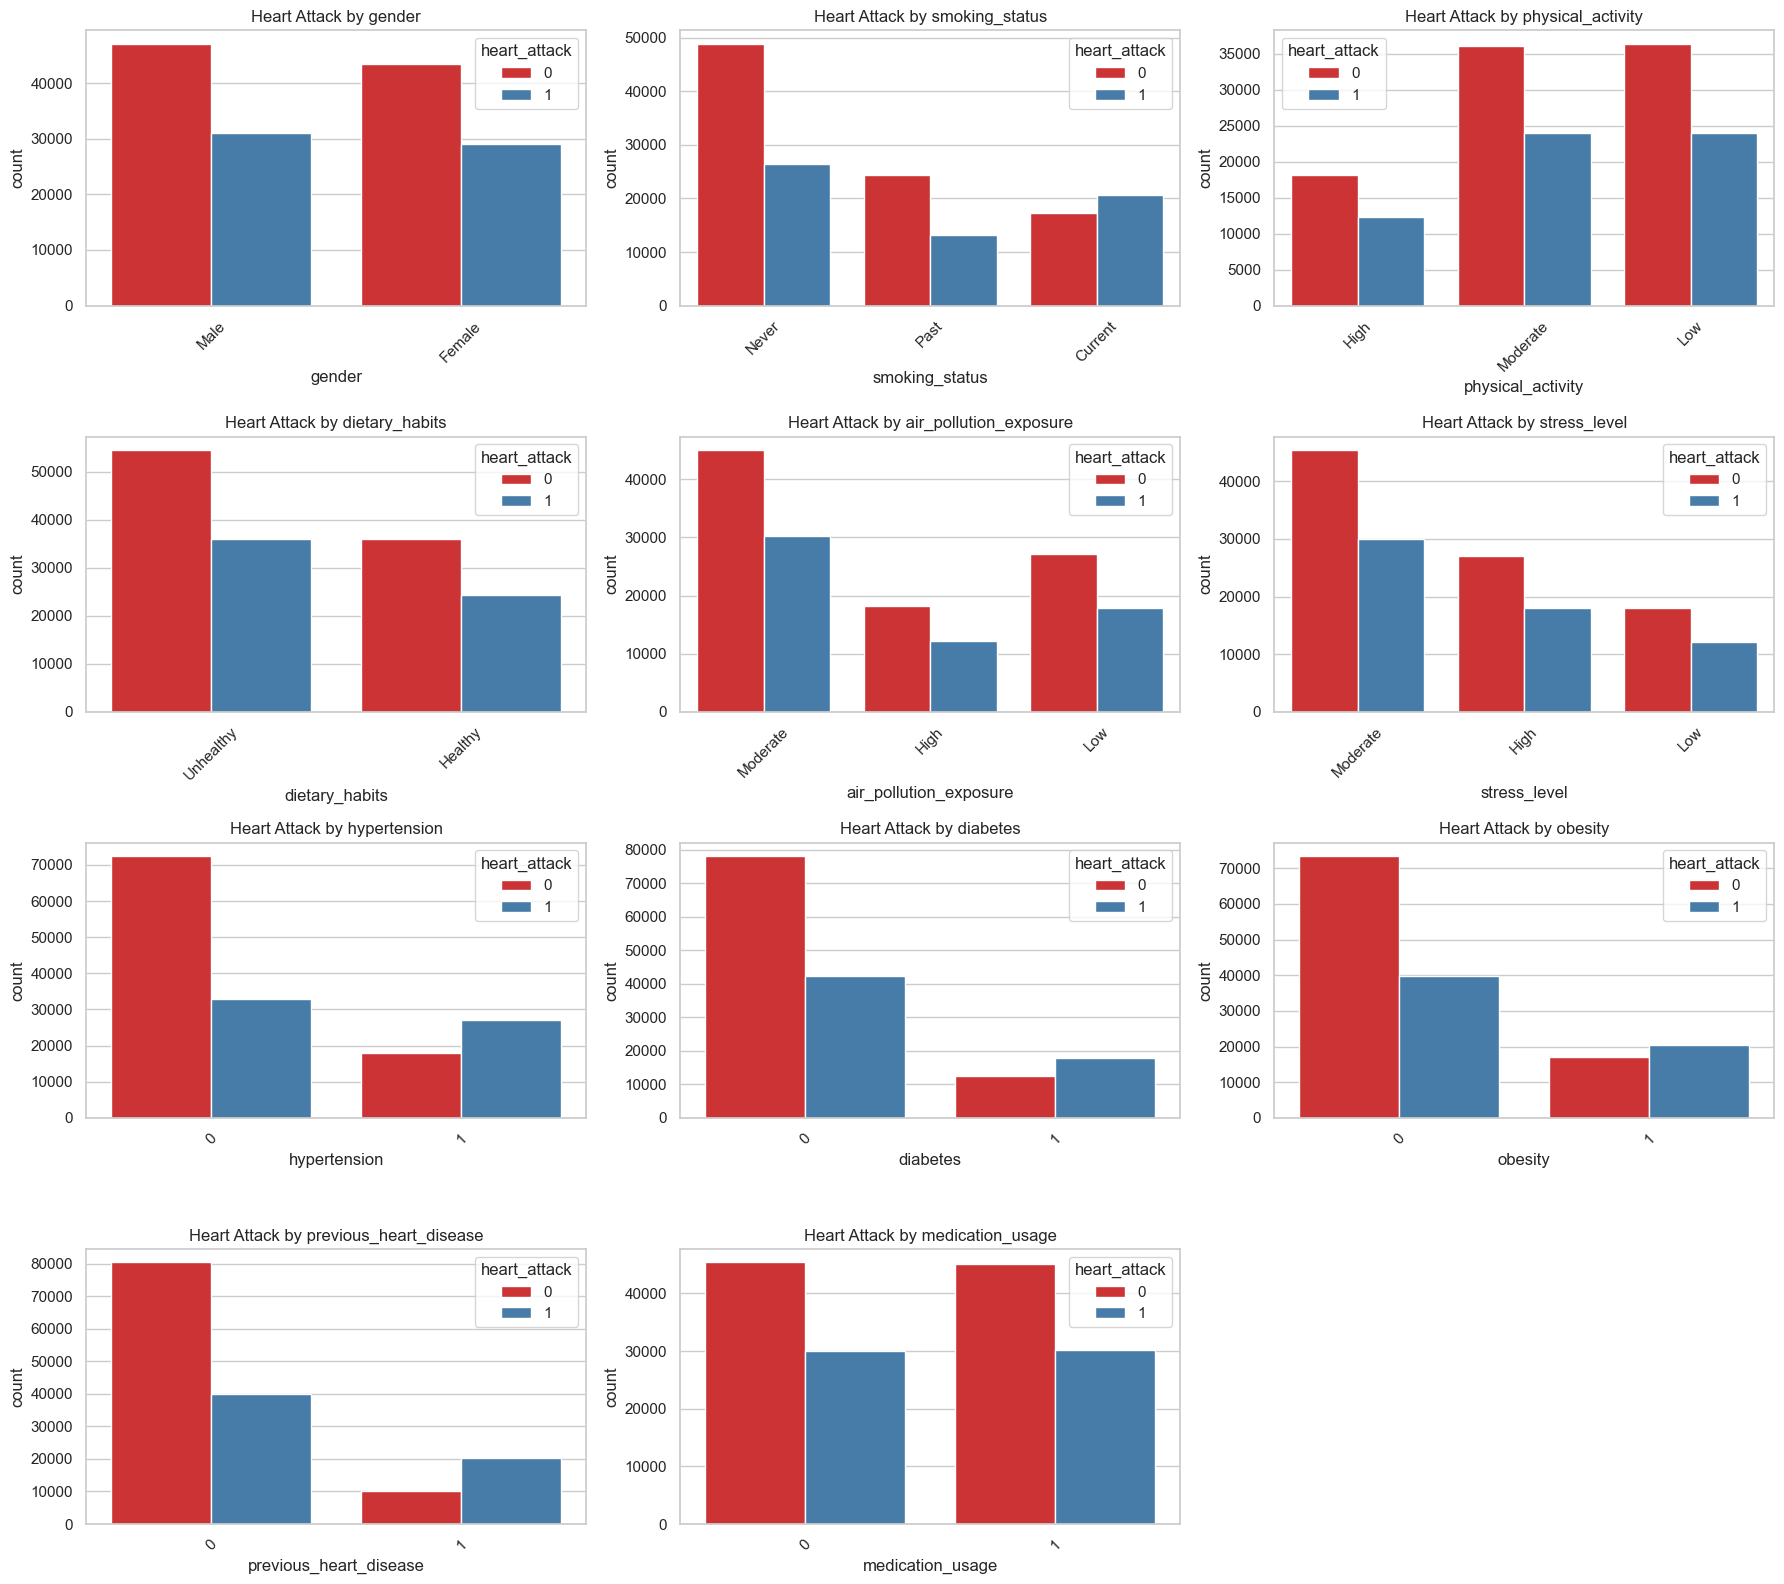

In [57]:
n_features = len(categorical_features)
n_cols = 3  # atur sesuai keinginan
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='heart_attack', data=df_no_outliers, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Heart Attack by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Menghapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight**
- Age: Pasien dengan serangan jantung cenderung berada di rentang usia yang lebih tinggi.
- Blood Pressure: Tekanan darah sistolik dan diastolik yang lebih tinggi kemungkinan besar berkaitan dengan serangan jantung.
- Sleep Hours: Jam tidur yang sangat rendah atau tidak teratur mungkin berkontribusi terhadap peningkatan risiko.
- Cholesterol LDL/HDL & Triglycerides: Profil lipid abnormal biasanya memperbesar kemungkinan serangan jantung.

In [58]:
corr = df_no_outliers.select_dtypes(include=['number']).corr()
print(corr)

                               age  cholesterol_level  waist_circumference  \
age                       1.000000          -0.003541             0.001111   
cholesterol_level        -0.003541           1.000000            -0.001002   
waist_circumference       0.001111          -0.001002             1.000000   
sleep_hours               0.001124           0.002972             0.001030   
blood_pressure_systolic  -0.001220          -0.002805             0.000171   
blood_pressure_diastolic  0.000806           0.001627             0.002875   
fasting_blood_sugar       0.000860          -0.001064             0.004223   
cholesterol_hdl           0.000905           0.002785            -0.003137   
cholesterol_ldl           0.000990           0.002474            -0.001037   
triglycerides             0.001138           0.000649             0.001723   

                          sleep_hours  blood_pressure_systolic  \
age                          0.001124                -0.001220   
cholester

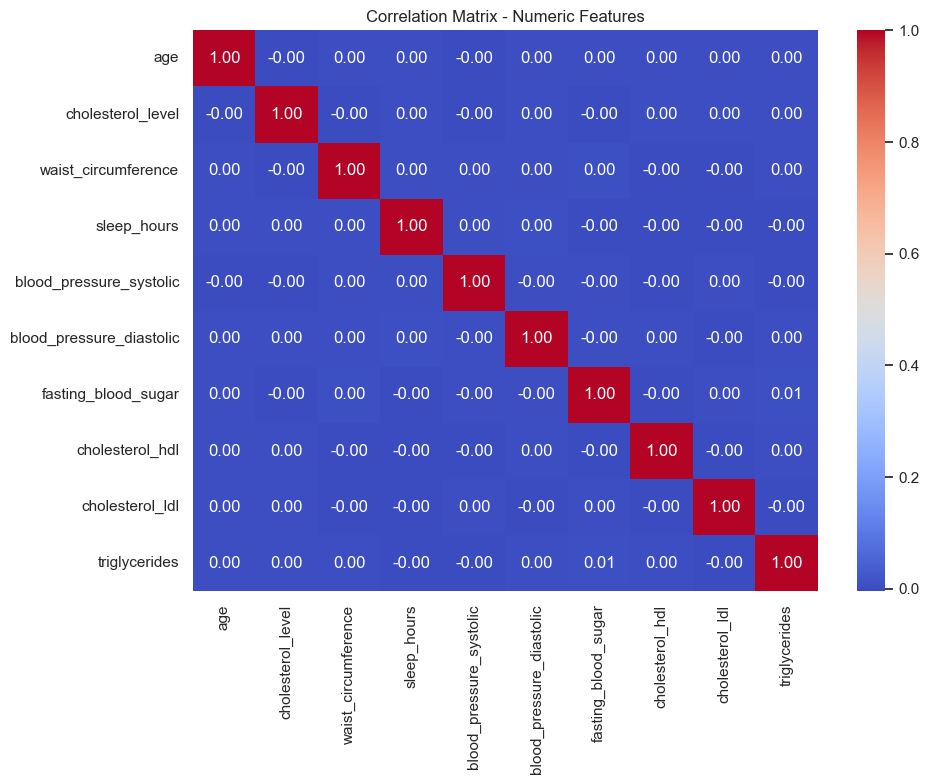

In [47]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Numeric Features')
plt.tight_layout()
plt.show()


**Insight**
- Tidak ada korelasi tinggi antar fitur numerik, yang terlihat dari nilai korelasi mendekati 0.
- Korelasi tertinggi terjadi antara:
    - blood_pressure_systolic dan blood_pressure_diastolic: ~0.5
    - cholesterol_level dan cholesterol_ldl: ~0.4
- Sebagian besar fitur berdistribusi independen, artinya masing-masing bisa menyumbang informasi unik ke dalam model prediksi.

<h1> Data Preparation

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Buat encoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Encode fitur kategorikal
encoded_cat = ohe.fit_transform(df[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=ohe.get_feature_names_out(categorical_features), index=df.index)

encoded_cat_df.head()

,gender_Male,smoking_status_Never,smoking_status_Past,physical_activity_Low,physical_activity_Moderate,dietary_habits_Unhealthy,air_pollution_exposure_Low,air_pollution_exposure_Moderate,stress_level_Low,stress_level_Moderate,hypertension_1,diabetes_1,obesity_1,previous_heart_disease_1,medication_usage_1
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


**Insight**
- Melakukan encoding dengan OHE pada data categorical yang hasilnya dapat dilihat di atas membagi nilai 1 atau 0, true or false

In [49]:
X_raw = pd.concat([df[numeric_features], encoded_cat_df], axis=1)
y = df['heart_attack'].astype(int)

**Insight**
- df[numeric_features]: Mengambil semua fitur numerik dari dataframe utama.
- encoded_cat_df: Merupakan dataframe hasil encoding (biasanya OneHotEncoder) dari fitur kategorikal, agar bisa digunakan dalam model ML.
- pd.concat(..., axis=1): Menggabungkan fitur numerik dan fitur kategorikal yang sudah di-encode secara horizontal (berdampingan kolomnya).
- Hasilnya: X_raw berisi seluruh fitur yang akan digunakan untuk pelatihan model.
- y: Label atau target yaitu kolom heart_attack, diubah menjadi tipe int (0 atau 1) agar bisa digunakan dalam model klasifikasi.

In [50]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

**Insight**
- Fungsi train_test_split digunakan untuk memisahkan data menjadi:
    - X_train_raw: Fitur untuk pelatihan.
    - X_test_raw: Fitur untuk pengujian.
    - y_train: Label untuk pelatihan.
    - y_test: Label untuk pengujian.
- test_size=0.2: Artinya 20% dari data akan digunakan untuk pengujian, sisanya 80% untuk pelatihan.
- random_state=42: Agar pembagian data konsisten (reproducible).
- stratify=y: Agar proporsi kelas 0 dan 1 pada label heart_attack tetap seimbang di kedua subset (train & test). Ini penting jika kelas tidak seimbang (imbalanced data).

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

**Insight**
- StandardScaler: Digunakan untuk standarisasi fitur (mean = 0, std = 1). Ini penting karena banyak algoritma machine learning sensitif terhadap skala fitur (misalnya SVM, KNN, Logistic Regression).
- fit_transform(X_train_raw): Skala fitur pelatihan dihitung (fit) dan diterapkan (transform) pada X_train_raw.
- transform(X_test_raw): Skala yang sama (mean & std dari data train) diterapkan ke data test.


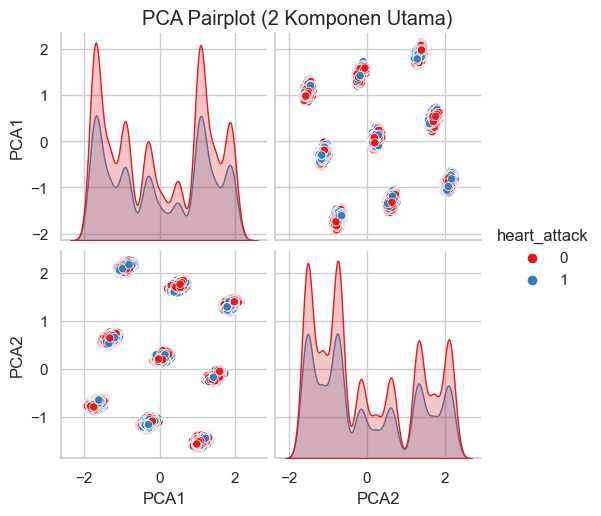

In [ ]:
# PCA pada data training (bisa juga pada gabungan train+test kalau hanya untuk visualisasi)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Buat dataframe untuk plot
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['heart_attack'] = y_train.values

# Pairplot
sns.pairplot(pca_df, hue='heart_attack', palette='Set1')
plt.suptitle("PCA Pairplot (2 Komponen Utama)", y=1.02)
plt.show()

**Insight**
- PCA berhasil mereduksi dimensi data dari banyak fitur menjadi dua komponen utama (PCA1 dan PCA2).
- Distribusi antar kelas cukup tumpang tindih, meskipun ada pola distribusi yang sedikit berbeda antara heart_attack=0 dan heart_attack=1.
- Cocok digunakan untuk eksplorasi visualisasi, tetapi kurang ideal sebagai input model klasifikasi secara langsung, karena bisa kehilangan informasi.



<h1> Modelling

In [53]:
logreg_balanced = LogisticRegression(class_weight='balanced', max_iter=500)
logreg_balanced.fit(X_pca, y_train)
y_pred_balanced = logreg_balanced.predict(X_pca)

print("Logistic Regression dengan class_weight='balanced':")
print(classification_report(y_train, y_pred_balanced))
print(f"Accuracy: {accuracy_score(y_train, y_pred_balanced):.4f}")

Logistic Regression dengan class_weight='balanced':
              precision    recall  f1-score   support

           0       0.60      0.42      0.50     75883
           1       0.40      0.58      0.48     50801

    accuracy                           0.49    126684
   macro avg       0.50      0.50      0.49    126684
weighted avg       0.52      0.49      0.49    126684

Accuracy: 0.4862


**Insight**
- Hasil:
    - Akurasi: 48.62%
    - Recall Kelas 1 (positif/heart attack): 58%
    - Recall Kelas 0 (negatif/tidak heart attack): 42%
    - F1-Score Kelas 1: 0.48
- Interpretasi:
    - Logistic Regression cukup baik dalam mengenali kasus heart attack (kelas 1), dengan recall 58%.
    - Tapi akurasi keseluruhan rendah (48.6%), karena model sering salah memprediksi kelas 0.
    - Setting class_weight='balanced' membantu memperbaiki bias terhadap kelas mayoritas (kelas 0), namun belum optimal.
    - Masih terjadi trade-off antara precision dan recall.

In [54]:
from sklearn.svm import SVC

# 2. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_pca, y_train)
y_pred_svm = svm.predict(X_pca)
print("Support Vector Machine:")
print(classification_report(y_train, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_train, y_pred_svm):.4f}")
print("-"*40)

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     75883
           1       0.00      0.00      0.00     50801

    accuracy                           0.60    126684
   macro avg       0.30      0.50      0.37    126684
weighted avg       0.36      0.60      0.45    126684

Accuracy: 0.5990
----------------------------------------


c:\Users\DELL\.conda\envs\python10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\.conda\envs\python10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\.conda\envs\python10\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Insight**
- Hasil:
    - Akurasi: 59.9%
    - Recall Kelas 0: 100%
    - Recall Kelas 1: 0%
    - F1-Score Kelas 1: 0
- Interpretasi:
    - Model SVM sangat tidak seimbang: memprediksi semua data sebagai kelas 0 saja.
    - Ini terjadi kemungkinan besar karena kelas 0 dominan, dan kamu belum melakukan penyesuaian untuk menangani data imbalance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 3. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_pca, y_train)
y_pred_knn = knn.predict(X_pca)
print("K-Nearest Neighbors:")
print(classification_report(y_train, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_train, y_pred_knn):.4f}")
print("-"*40)

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77     75883
           1       0.67      0.55      0.60     50801

    accuracy                           0.71    126684
   macro avg       0.70      0.68      0.69    126684
weighted avg       0.71      0.71      0.70    126684

Accuracy: 0.7110
----------------------------------------


**Insight**
- Hasil:
    - Akurasi: 71.1%
    - Recall Kelas 0: 82%
    - Recall Kelas 1: 55%
    - F1-Score Kelas 1: 0.60
- Interpretasi:
    - Model mampu mengenali kelas mayoritas (kelas 0) dengan baik, tapi masih kurang dalam mendeteksi pasien yang mengalami serangan jantung (kelas 1).
    - Nilai recall kelas 1 hanya 55%, artinya banyak kasus serangan jantung yang tidak terdeteksi.

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 4. XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Suppress warning
xgb.fit(X_pca, y_train)
y_pred_xgb = xgb.predict(X_pca)

print("XGBoost Classifier:")
print(classification_report(y_train, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_train, y_pred_xgb):.4f}")
print("-"*40)

c:\Users\DELL\.conda\envs\python10\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.62      0.96      0.76     75883
           1       0.70      0.14      0.23     50801

    accuracy                           0.63    126684
   macro avg       0.66      0.55      0.49    126684
weighted avg       0.66      0.63      0.54    126684

Accuracy: 0.6303
----------------------------------------


**Insight**
- Hasil:
    - Akurasi: 63.03%
    - Recall Kelas 0: 96%
    - Recall Kelas 1: 14%
    - F1-Score Kelas 1: 0.23
- Interpretasi:
    - Model sangat dominan memprediksi kelas 0 (tidak serangan jantung), dengan recall 96%.
    - Namun, sangat buruk dalam mendeteksi kelas 1 (serangan jantung), dengan recall hanya 14%.
    - Ini menunjukkan model tidak seimbang, sangat bias terhadap kelas mayoritas.